# Análisis de Datos - Miniproyecto 1

## María José Fonseca Vázquez

Elegí analizar un archivo que muestra la deserción escolar en México por región y nivel educativo.

Preguntas a responer:

* ¿En qué estados se obtuvo  la mayor deserción para cada nivel escolar en el último año?
* ¿En qué estados se obtuvo  la menor deserción para cada nivel escolar en el último año?
* ¿En qué año se tuvo mayor deserción escolar a nivel Medio Superior?
* ¿En qué año se tuvo mayor deserción escolar a nivel Superior?
* ¿Cómo ha evolucionado la deserción escolar a nivel Primaria?
* ¿Cómo ha evolucionado la deserción escolar a nivel Secundaria?
* ¿Qué porcentaje de deserción escolar se presenta en Guanajuato para el último ciclo?
* ¿Cúal es la deserción escolar por nivel escolar en Estados Unidos para el último ciclo?
* ¿Cómo se compara la deserción escolar de México con la de Estados Unidos para el último ciclo?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

In [2]:
Educ = pd.read_excel('Educ.xlsx', header = 0) #Leo mi base de datos
Educ

,Unnamed: 0,Unnamed: 1,2000/2001,2005/2006,2010/2011,2015/2016,2018/2019
0,Estados Unidos Mexicanos,Primaria,1.9,1.3,0.7,0.7,0.6
1,NaN,Secundaria,8.3,7.7,5.6,4.4,4.4
2,NaN,Media superior,17.5,16.5,14.9,13.3,12.9
3,NaN,Superior,8.3,7.6,7.1,7.0,8.3
4,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.1
...,...,...,...,...,...,...,...
127,NaN,Superior,5.1,6.4,9.7,8.3,8.8
128,Zacatecas,Primaria,2.1,1.4,0.8,0.7,0.4
129,NaN,Secundaria,10.8,9.0,5.9,6.6,5.9
130,NaN,Media superior,17.4,16.6,14.3,13.9,12.5


Arreglo mi base de datos, de tal forma que pueda acceder fácilmente a todos mis datos y categorías:

In [3]:
Educ = Educ.fillna(method='ffill') #Lleno casillas de estados vacías
Educ.rename(columns = {'Unnamed: 0':'Estado'}, inplace = True) #Renombro columna 0
Educ.rename(columns = {'Unnamed: 1':'NivelEducativo'}, inplace = True) #Renombro columna 1
Educ

,Estado,NivelEducativo,2000/2001,2005/2006,2010/2011,2015/2016,2018/2019
0,Estados Unidos Mexicanos,Primaria,1.9,1.3,0.7,0.7,0.6
1,Estados Unidos Mexicanos,Secundaria,8.3,7.7,5.6,4.4,4.4
2,Estados Unidos Mexicanos,Media superior,17.5,16.5,14.9,13.3,12.9
3,Estados Unidos Mexicanos,Superior,8.3,7.6,7.1,7.0,8.3
4,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.1
...,...,...,...,...,...,...,...
127,Yucatán,Superior,5.1,6.4,9.7,8.3,8.8
128,Zacatecas,Primaria,2.1,1.4,0.8,0.7,0.4
129,Zacatecas,Secundaria,10.8,9.0,5.9,6.6,5.9
130,Zacatecas,Media superior,17.4,16.6,14.3,13.9,12.5


¿En qué estados se obtuvo la mayor deserción para cada nivel escolar en el último año?

¿En qué estados se obtuvo la menor deserción para cada nivel escolar en el último año?

In [4]:
Prim = Educ[Educ.NivelEducativo == 'Primaria'] #Filtro datos para cada nivel educativo
Sec = Educ[Educ.NivelEducativo == 'Secundaria']
Prep = Educ[Educ.NivelEducativo == 'Media superior']
Univ = Educ[Educ.NivelEducativo == 'Superior']

Primaria:

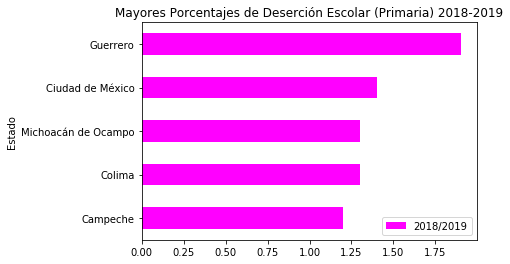

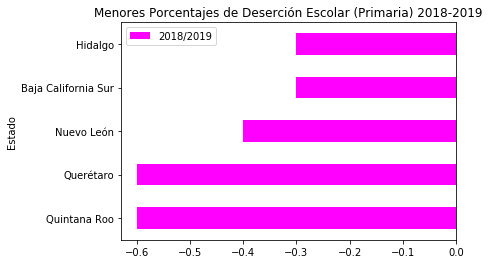

In [11]:
#Ordeno los valores de mayor a menor deserción y grafico los extremos en gráficas independientes 
ax = Prim.sort_values('2018/2019', ascending=True).tail().plot.barh(x='Estado', y='2018/2019', color = 'magenta')
plt.title('Mayores Porcentajes de Deserción Escolar (Primaria) 2018-2019')
plt.savefig('MayDesPrim1819')
ax = Prim.sort_values('2018/2019', ascending=True).head().plot.barh(x='Estado', y='2018/2019', color = 'magenta')
plt.title('Menores Porcentajes de Deserción Escolar (Primaria) 2018-2019')
plt.savefig('MenDesPrim1819')

Secundaria:

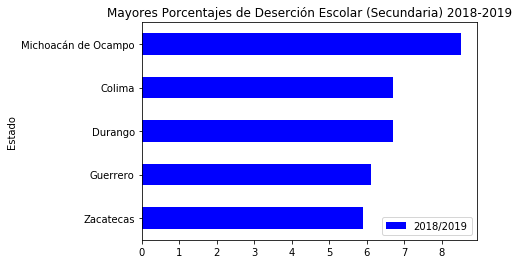

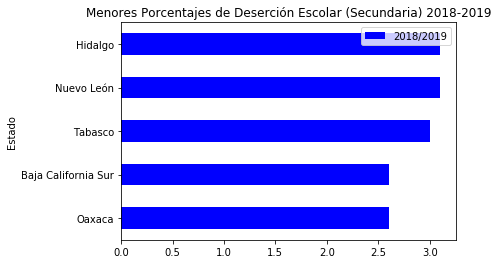

In [12]:
#Ordeno los valores de mayor a menor deserción y grafico los extremos en gráficas independientes 
ax = Sec.sort_values('2018/2019', ascending=True).tail().plot.barh(x='Estado', y='2018/2019', color = 'blue')
plt.title('Mayores Porcentajes de Deserción Escolar (Secundaria) 2018-2019')
plt.savefig('MayDesSec1819')
ax = Sec.sort_values('2018/2019', ascending=True).head().plot.barh(x='Estado', y='2018/2019', color = 'blue')
plt.title('Menores Porcentajes de Deserción Escolar (Secundaria) 2018-2019')
plt.savefig('MenDesSec1819')

Preparatoria:

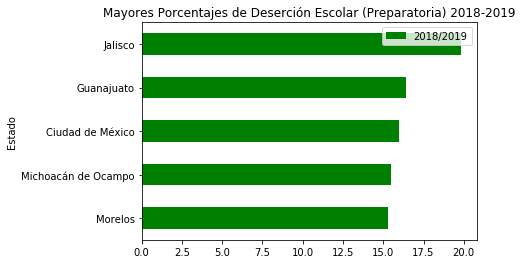

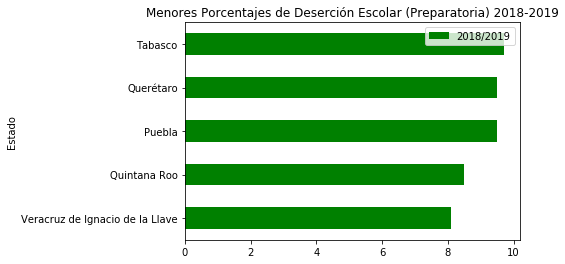

In [13]:
#Ordeno los valores de mayor a menor deserción y grafico los extremos en gráficas independientes 
ax = Prep.sort_values('2018/2019', ascending=True).tail().plot.barh(x='Estado', y='2018/2019', color = 'green')
plt.title('Mayores Porcentajes de Deserción Escolar (Preparatoria) 2018-2019')
plt.savefig('MayDesPrep1819')
ax = Prep.sort_values('2018/2019', ascending=True).head().plot.barh(x='Estado', y='2018/2019', color = 'green')
plt.title('Menores Porcentajes de Deserción Escolar (Preparatoria) 2018-2019')
plt.savefig('MenDesPrep1819')

Universidad:

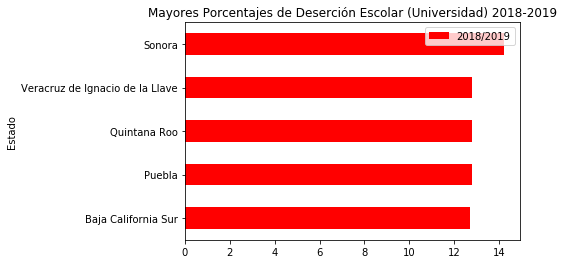

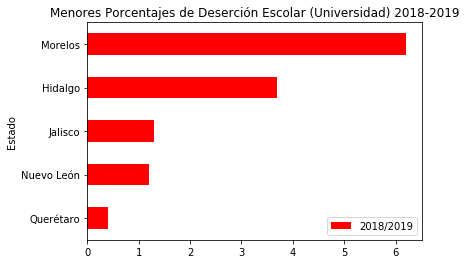

In [14]:
#Ordeno los valores de mayor a menor deserción y grafico los extremos en gráficas independientes 
ax = Univ.sort_values('2018/2019', ascending=True).tail().plot.barh(x='Estado', y='2018/2019', color = 'red')
plt.title('Mayores Porcentajes de Deserción Escolar (Universidad) 2018-2019')
plt.savefig('MayDesUniv1819')
ax = Univ.sort_values('2018/2019', ascending=True).head().plot.barh(x='Estado', y='2018/2019', color = 'red')
plt.title('Menores Porcentajes de Deserción Escolar (Universidad) 2018-2019')
plt.savefig('MenDesUniv1819')

¿En qué año se tuvo mayor deserción escolar a nivel Medio Superior?

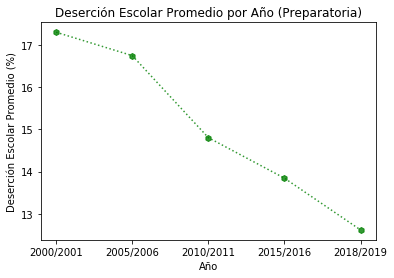

In [15]:
years = ['2000/2001', '2005/2006', '2010/2011', '2015/2016', '2018/2019'] #Lista con los años
MeanPrep = [] #Aquí irán las medias anuales
for year in years:
    MeanPrep.append([Prep[year].mean(axis = 0)])#Agregamos los promedios de deserción
plt.plot(years, MeanPrep, "gh", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar Promedio por Año (Preparatoria)')
plt.xlabel('Año')
plt.ylabel('Deserción Escolar Promedio (%)')
plt.savefig('AnualPrep')

¿En qué año se tuvo mayor deserción escolar a nivel Superior?

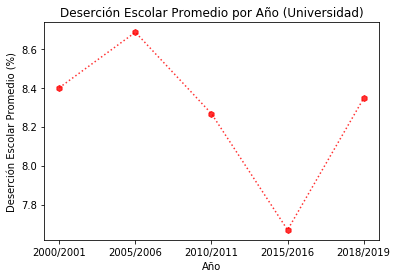

In [16]:
years = ['2000/2001', '2005/2006', '2010/2011', '2015/2016', '2018/2019']
MeanUniv = []
for year in years:
    MeanUniv.append([Univ[year].mean(axis = 0)])
plt.plot(years, MeanUniv, "rh", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar Promedio por Año (Universidad)')
plt.xlabel('Año')
plt.ylabel('Deserción Escolar Promedio (%)')
plt.savefig('AnualUniv')

¿Cómo ha evolucionado la deserción escolar a nivel Primaria?

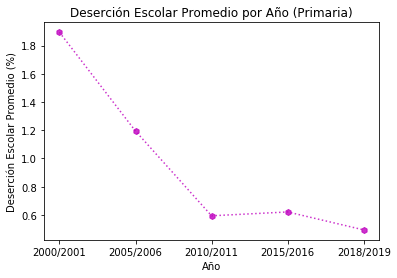

In [17]:
years = ['2000/2001', '2005/2006', '2010/2011', '2015/2016', '2018/2019'] #Lista con los años
MeanPrim = [] #Aquí irán las medias anuales
for year in years:
    MeanPrim.append([Prim[year].mean(axis = 0)])#Agregamos los promedios de deserción
plt.plot(years, MeanPrim, "mh", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar Promedio por Año (Primaria)')
plt.xlabel('Año')
plt.ylabel('Deserción Escolar Promedio (%)')
plt.savefig('AnualPrim')

¿Cómo ha evolucionado la deserción escolar a nivel Secundaria?

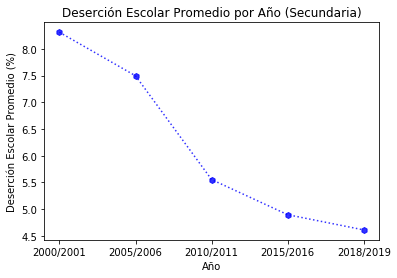

In [18]:
years = ['2000/2001', '2005/2006', '2010/2011', '2015/2016', '2018/2019'] #Lista con los años
MeanSec = [] #Aquí irán las medias anuales
for year in years:
    MeanSec.append([Sec[year].mean(axis = 0)])#Agregamos los promedios de deserción
plt.plot(years, MeanSec, "bh", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar Promedio por Año (Secundaria)')
plt.xlabel('Año')
plt.ylabel('Deserción Escolar Promedio (%)')
plt.savefig('AnualSec')

¿Qué porcentaje de deserción escolar se presenta en Guanajuato para el último ciclo?

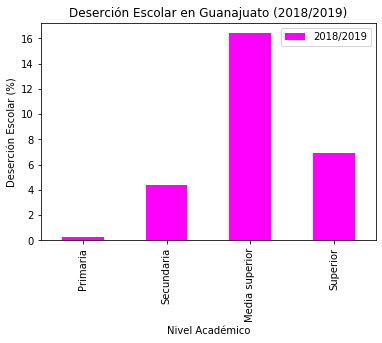

In [19]:
Gua = Educ[Educ.Estado == 'Guanajuato']
Nivel = ['Primaria', 'Secundaria', 'Media superior' , 'Superior']
MeanDesGua = []
#Gua['2018/2019'] 
for niv in Nivel:
    aux_ = Gua[Gua.NivelEducativo == niv]
    MeanDesGua.append(aux_['2018/2019'].to_string(index=False))
    #   MeanDesGua.append([Gua[Nivel].mean(axis = 0)])#Agregamos los promedios de deserción
ax = Gua.plot.bar(x='NivelEducativo', y='2018/2019', color = 'magenta')
#plt.plot(Nivel, MeanDesGua, "co", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar en Guanajuato (2018/2019)')
plt.xlabel('Nivel Académico')
plt.ylabel('Deserción Escolar (%)')
plt.savefig('Gua')

¿Cúal es la deserción escolar por nivel escolar en Estados Unidos?

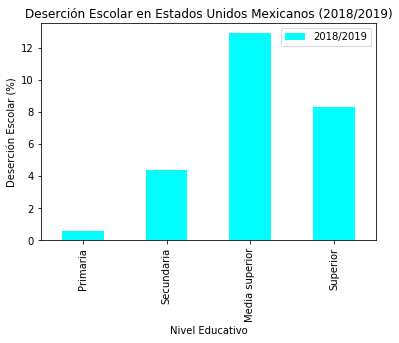

In [20]:
EU = Educ[Educ.Estado == 'Estados Unidos Mexicanos']
Nivel = ['Primaria', 'Secundaria', 'Media superior' , 'Superior']
MeanDesEU = []
#Gua['2018/2019'] 
for niv in Nivel:
    aux_ = EU[EU.NivelEducativo == niv]
    MeanDesEU.append(aux_['2018/2019'].to_string(index=False))
    #   MeanDesGua.append([Gua[Nivel].mean(axis = 0)])#Agregamos los promedios de deserción
ax = EU.plot.bar(x='NivelEducativo', y='2018/2019', color = 'cyan')
#plt.plot(Nivel, MeanDesGua, "co", linestyle = 'dotted',alpha = .8)
plt.title('Deserción Escolar en Estados Unidos Mexicanos (2018/2019)')
plt.xlabel('Nivel Educativo')
plt.ylabel('Deserción Escolar (%)')
plt.savefig('EU')

¿Cómo se compara la deserción escolar de México con la de Estados Unidos para el último ciclo?

In [21]:
NOEU = Educ #NOEU será la base de datos sin original sin Estados Unidos
indexNames = NOEU[NOEU.Estado == 'Estados Unidos Mexicanos' ].index #Filtro para eliminar los datos de EU.
 
# Delete these row indexes from dataFrame 
NOEU.drop(indexNames , inplace=True)
NOEU

,Estado,NivelEducativo,2000/2001,2005/2006,2010/2011,2015/2016,2018/2019
4,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.1
5,Aguascalientes,Secundaria,8.0,8.2,4.5,5.9,5.8
6,Aguascalientes,Media superior,16.6,15.6,15.2,13.3,12.4
7,Aguascalientes,Superior,3.8,5.8,7.3,6.3,7.5
8,Baja California,Primaria,1.3,1.2,0.2,-0.2,0.4
...,...,...,...,...,...,...,...
127,Yucatán,Superior,5.1,6.4,9.7,8.3,8.8
128,Zacatecas,Primaria,2.1,1.4,0.8,0.7,0.4
129,Zacatecas,Secundaria,10.8,9.0,5.9,6.6,5.9
130,Zacatecas,Media superior,17.4,16.6,14.3,13.9,12.5


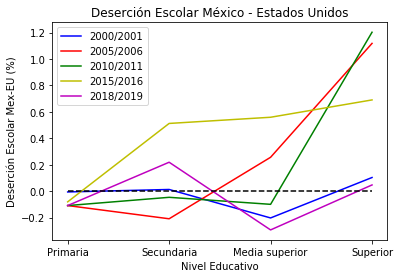

In [24]:
NOEU_ = NOEU.groupby('NivelEducativo').mean()
NOEU_ = NOEU_.reset_index()
style = ['b-', 'r-', 'g-', 'y-', 'm-']
EU_ = EU
EU_ = EU_.drop(columns = 'Estado')
EU_ = EU_.set_index('NivelEducativo')
NOEU_ = NOEU.groupby('NivelEducativo').mean()
DIF_ = NOEU_ - EU_
DIF_ = DIF_.reset_index()
#print(DIF_)

temp = DIF_.iloc[0].copy()
DIF_.iloc[0] = DIF_.iloc[1]
DIF_.iloc[1] = DIF_.iloc[2]
DIF_.iloc[2] = temp

i = 0
for year in years:
    plt.plot(Nivel, DIF_[year], style[i], label = year)
    i += 1
plt.plot(Nivel, [0, 0, 0, 0], 'k--')
plt.title('Deserción Escolar México - Estados Unidos')
plt.xlabel('Nivel Educativo')
plt.ylabel('Deserción Escolar Mex-EU (%)')
plt.legend(loc='best')
plt.savefig('MexUSA')
plt.show()